<a href="https://colab.research.google.com/github/KUMARPALAKOLLU/socialNetworkAnalysis/blob/main/heterogeneousGraphVisualization%26clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**P V S N S GANESH KUMAR**

**22MCB0036**

**DATASET:** [Dataset](https://github.com/Jhy1993/Datasets-for-Heterogeneous-Graph/tree/master/Douban%20Book)

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load the data from each file
state_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/student_state.csv',header=None)
state_data = state_data.head(34)
degree_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/student_ugDegree.csv',header=None)
stay_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/student_stay.csv',header=None)

In [3]:
state_data

,0,1
0,22MCB0001,Tamil Nadu
1,22MCB0002,Gujarat
2,22MCB0003,Karnataka
3,22MCB0004,Maharastra
4,22MCB0005,Andhra Pradesh
5,22MCB0006,Tamil Nadu
6,22MCB0007,Delhi
7,22MCB0008,Madhya Pradesh
8,22MCB0009,Tamil Nadu
9,22MCB0010,Tamil Nadu


In [4]:
# Create an empty graph
G = nx.Graph()

In [5]:
# Add nodes and edges to the graph
students = set(state_data.iloc[:, 0])
states = set(state_data.iloc[:, 1])
degrees = set(degree_data.iloc[:, 1])
stays = set(stay_data.iloc[:, 1])

In [6]:
students = list(students)
states = list(states)
degrees = list(degrees)
stays = list(stays)

In [7]:
# Add nodes to the graph
for student in students:
   G.add_node(student, node_type='student')
for state in states:
    G.add_node(state, node_type='state')
for degree in degrees:
    G.add_node(degree, node_type='degree')
for stay in stays:
    G.add_node(stay, node_type='stay')

In [8]:
# Add edges to the graph
for _, row in state_data.iterrows():
    student = row[0]
    state = row[1]
    G.add_edge(student, state)

for _, row in degree_data.iterrows():
    student = row[0]
    degree = row[1]
    G.add_edge(student, degree)

for _, row in stay_data.iterrows():
    student = row[0]
    stay = row[1]
    G.add_edge(student, stay)


In [9]:
# !pip install pyvis
# !pip install weasyprint
# !pip install IPython

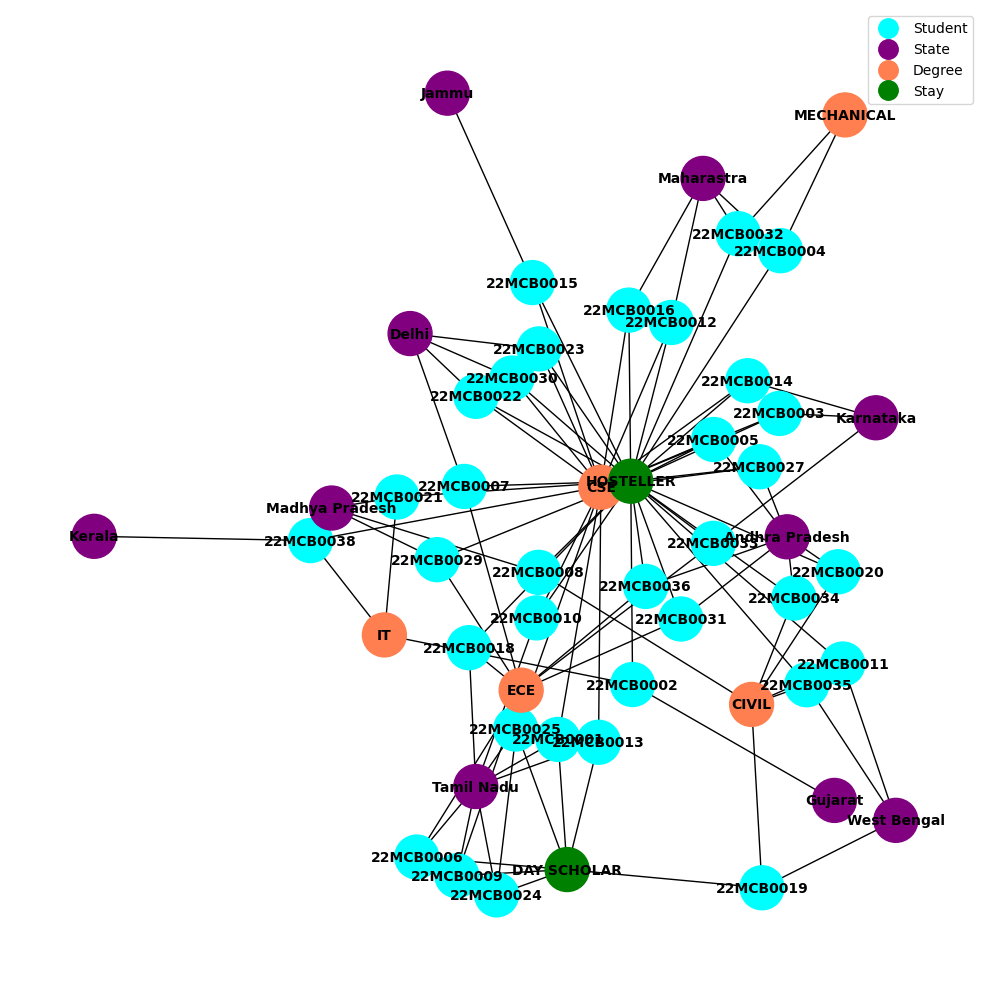

In [10]:
# Draw the graph
plt.figure(figsize=(10, 10))  # Adjust the figure size as needed
pos = nx.spring_layout(G, scale=5)  # Specify the layout algorithm and increase the scale
node_colors = {'student': 'aqua', 'state': 'purple', 'degree': 'coral', 'stay': 'green'}
node_types = nx.get_node_attributes(G, 'node_type')
node_color = [node_colors[node_types[node]] for node in G.nodes]
edge_color = 'black'  # Specify the edge color
edge_width = 1  # Specify the edge width

nx.draw_networkx(
    G, pos=pos, node_color=node_color, with_labels=True,
    node_size=1000, font_size=10, font_weight='bold',
    edge_color=edge_color, width=edge_width
)

# Create a legend for the node colors
legend_labels = ['Student', 'State', 'Degree', 'Stay']
legend_colors = node_colors.values()
legend_handles = [plt.Line2D([], [], marker='o', markersize=14, color=color, linestyle='None')
                  for color in legend_colors]
plt.legend(legend_handles, legend_labels)

# Display the graph
plt.axis('off')  # Remove the axis
plt.tight_layout()  # Adjust the layout
plt.show()


# **Clustering and Classification**

In [11]:
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import metrics
from sklearn.cluster import KMeans
import numpy as np

In [12]:
# Convert node types into a list of strings
node_features = nx.get_node_attributes(G, 'node_type')
feature_values = list(node_features.values())

In [13]:
# Perform one-hot encoding on the feature values
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(np.array(feature_values).reshape(-1, 1))

# Calculate the similarity matrix using cosine similarity
similarity_matrix = cosine_similarity(encoded_features)
# Perform clustering on the similarity matrix
num_clusters = 3
cluster_colors = ['cyan', 'magenta', 'brown','red', 'blue', 'green', 'orange', 'purple', 'pink', 'yellow']


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [14]:
# Function to print the clustered graph
def print_clustered(algorithm):
  # Visualize the graph with node colors based on clusters
  plt.figure(figsize=(10, 10))
  pos = nx.spring_layout(G, scale=5)
  node_clusters = nx.get_node_attributes(G, 'cluster')
  node_color = [cluster_colors[node_clusters[node]] for node in G.nodes]
  edge_color = 'black'
  edge_width = 0.5

  nx.draw_networkx(
      G, pos=pos, node_color=node_color, with_labels=True,
      node_size=1000, font_size=10, font_weight='bold',
      edge_color=edge_color, width=edge_width
  )
  # Create a legend for the cluster colors
  legend_labels = [f"cluster {i+1} ({algorithm})" for i in range(len(cluster_colors))]
  legend_colors = cluster_colors[:num_clusters]
  legend_handles = [plt.Line2D([], [], marker='o', markersize=14, color=color, linestyle='None')
                    for color in legend_colors]
  plt.legend(legend_handles, legend_labels)

  # Display the graph
  plt.axis('off')
  plt.tight_layout()
  plt.show()
  # Calculate clustering evaluation metrics
  labels_true = list(node_clusters.values())
  silhouette_score = metrics.silhouette_score(encoded_features, labels_true)
  adjusted_rand_index = metrics.adjusted_rand_score(labels_true, clustering)
  return (silhouette_score,adjusted_rand_index)



# **Spectral Clustering**

In [15]:
clustering = SpectralClustering(n_clusters=num_clusters, affinity='precomputed').fit_predict(similarity_matrix)

# Assign cluster labels to the nodes in the graph
for i, node in enumerate(G.nodes()):
    G.nodes[node]['cluster'] = clustering[i]

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


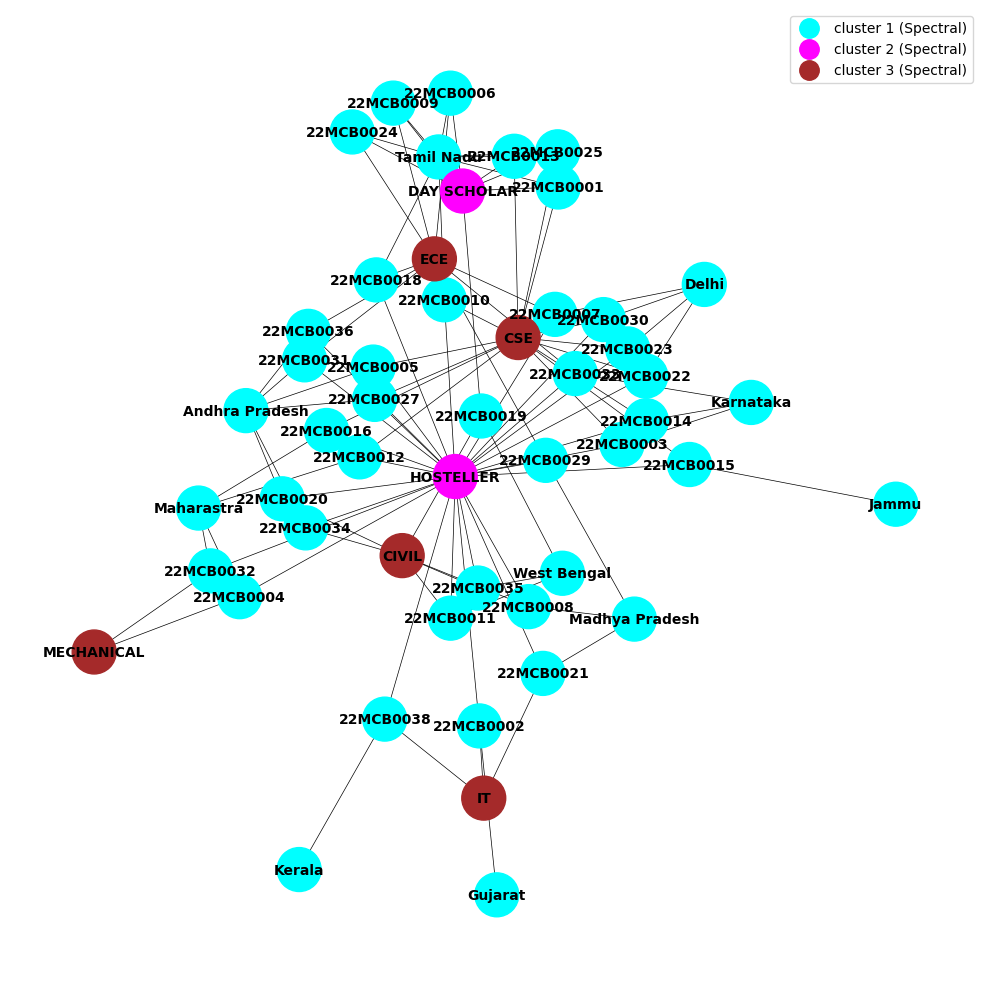

In [16]:
# Visualize the graph with node colors based on clusters
silhouette_score_spectral,adjusted_rand_index_spectral = print_clustered('Spectral')


In [17]:
print("Silhouette Score Spectral clustering: ", silhouette_score_spectral)
print("Adjusted Rand Index Spectral clustering: ", adjusted_rand_index_spectral)

Silhouette Score Spectral clustering:  0.689922480620155
Adjusted Rand Index Spectral clustering:  1.0


# **K-Means Clustering**

In [18]:
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(encoded_features)
clustering = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [19]:
# Assign cluster labels to the nodes in the graph
for i, node in enumerate(G.nodes()):
    G.nodes[node]['cluster'] = clustering[i]

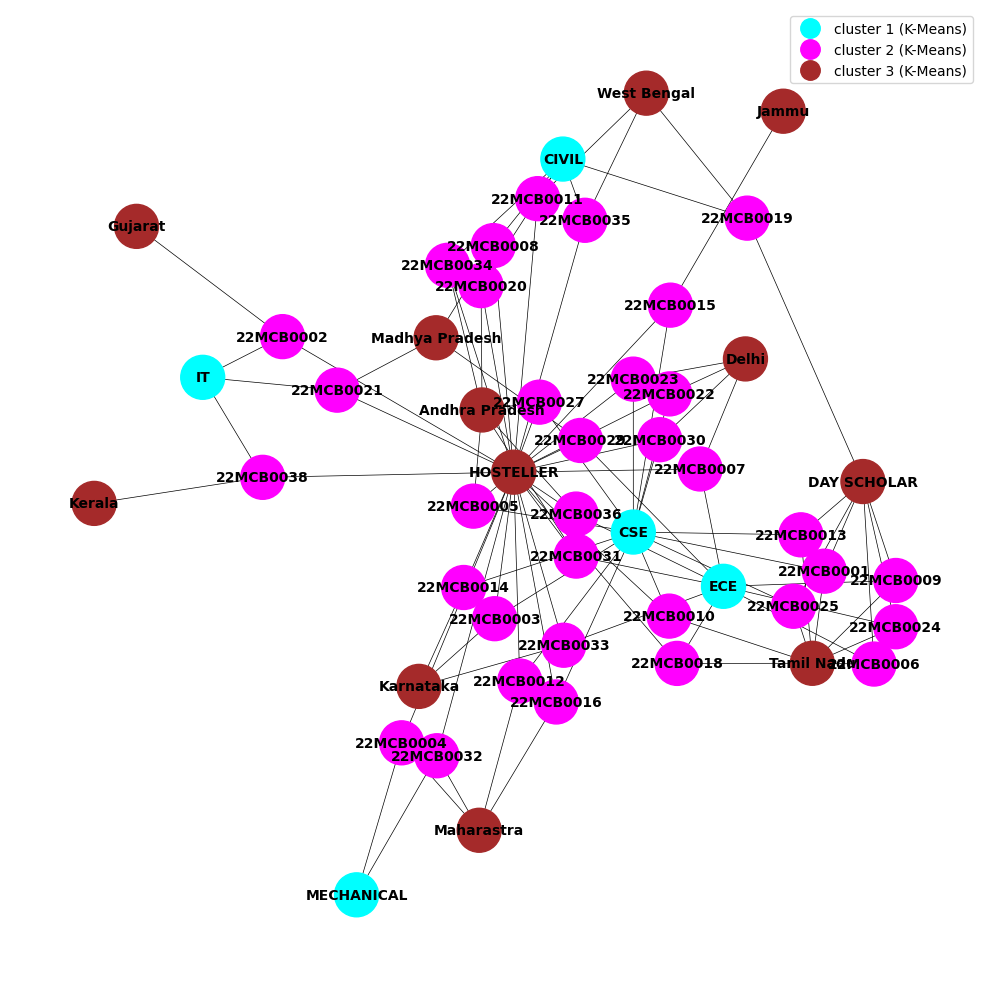

In [20]:
# Visualize the graph with node colors based on clusters
silhouette_score_Kmeans,adjusted_rand_index_Kmeans = print_clustered('K-Means')


In [21]:
print("Silhouette Score K-Means clustering: ", silhouette_score_Kmeans)
print("Adjusted Rand Index K-Means clustering: ", adjusted_rand_index_Kmeans)

Silhouette Score K-Means clustering:  0.9286987522281642
Adjusted Rand Index K-Means clustering:  1.0


# **Performance Metrics**

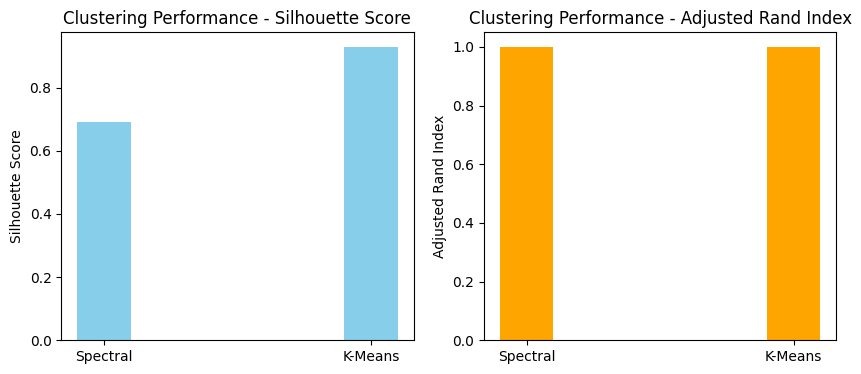

In [22]:
import matplotlib.pyplot as plt

# Assuming you have the Silhouette Scores and Adjusted Rand Index values for both methods
silhouette_scores = [silhouette_score_spectral, silhouette_score_Kmeans]
adjusted_rand_indices = [adjusted_rand_index_spectral, adjusted_rand_index_Kmeans]
methods = ['Spectral', 'K-Means']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Plot Silhouette Scores
axes[0].bar(methods, silhouette_scores, color='skyblue',width=0.2)
axes[0].set_ylabel('Silhouette Score')
axes[0].set_title('Clustering Performance - Silhouette Score')

# Plot Adjusted Rand Indices
axes[1].bar(methods, adjusted_rand_indices, color='orange',width=0.2)
axes[1].set_ylabel('Adjusted Rand Index')
axes[1].set_title('Clustering Performance - Adjusted Rand Index')

# Adjust spacing between subplots
plt.subplots_adjust(hspace=1)

# Display the plots
plt.show()


# **Classification**

In [23]:
# Assign cluster labels to the nodes in the graph
for i, node in enumerate(G.nodes()):
    print(node,G.nodes[node]['cluster'])

22MCB0027 1
22MCB0007 1
22MCB0005 1
22MCB0016 1
22MCB0014 1
22MCB0009 1
22MCB0022 1
22MCB0024 1
22MCB0030 1
22MCB0001 1
22MCB0015 1
22MCB0008 1
22MCB0025 1
22MCB0006 1
22MCB0004 1
22MCB0031 1
22MCB0003 1
22MCB0002 1
22MCB0029 1
22MCB0011 1
22MCB0019 1
22MCB0010 1
22MCB0036 1
22MCB0032 1
22MCB0012 1
22MCB0020 1
22MCB0021 1
22MCB0013 1
22MCB0018 1
22MCB0033 1
22MCB0038 1
22MCB0023 1
22MCB0034 1
22MCB0035 1
Jammu 2
Karnataka 2
Tamil Nadu 2
Andhra Pradesh 2
Delhi 2
Gujarat 2
Maharastra 2
Kerala 2
West Bengal 2
Madhya Pradesh 2
MECHANICAL 0
ECE 0
IT 0
CIVIL 0
CSE 0
DAY SCHOLAR 2
HOSTELLER 2


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Extract relevant features for classification
node_features = nx.get_node_attributes(G, 'node_type')

In [25]:
# Prepare the feature matrix and target labels
X = []
y = []
for node, features in node_features.items():
    X.append(node)
    y.append(G.nodes[node]['cluster'])  # Assign class labels based on your criteria
print(X,y)

['22MCB0027', '22MCB0007', '22MCB0005', '22MCB0016', '22MCB0014', '22MCB0009', '22MCB0022', '22MCB0024', '22MCB0030', '22MCB0001', '22MCB0015', '22MCB0008', '22MCB0025', '22MCB0006', '22MCB0004', '22MCB0031', '22MCB0003', '22MCB0002', '22MCB0029', '22MCB0011', '22MCB0019', '22MCB0010', '22MCB0036', '22MCB0032', '22MCB0012', '22MCB0020', '22MCB0021', '22MCB0013', '22MCB0018', '22MCB0033', '22MCB0038', '22MCB0023', '22MCB0034', '22MCB0035', 'Jammu', 'Karnataka', 'Tamil Nadu', 'Andhra Pradesh', 'Delhi', 'Gujarat', 'Maharastra', 'Kerala', 'West Bengal', 'Madhya Pradesh', 'MECHANICAL', 'ECE', 'IT', 'CIVIL', 'CSE', 'DAY SCHOLAR', 'HOSTELLER'] [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2]


In [26]:
# Reshape the feature matrix
X_reshaped = [[x] for x in X]  # Reshape to a 2D array

# Perform one-hot encoding on the feature matrix
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X_reshaped)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# **Support Vector Machine(SVM)**

In [28]:
classifier = SVC()
classifier.fit(X_train, y_train)

SVC()

In [29]:
# Predict the class labels for the test data
y_pred = classifier.predict(X_test)

# Evaluate the model's performance
accuracy_svm = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy_svm)


Accuracy:  0.7272727272727273


# **Decision Tree**

In [30]:
from sklearn.tree import DecisionTreeClassifier
# Train a decision tree classifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)


DecisionTreeClassifier()

In [31]:
# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy_decision = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy_decision)

Accuracy:  0.7272727272727273


# **Logistic Regression**

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
# Train a logistic regression classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [34]:
# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy_log = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy_log)

Accuracy:  0.7272727272727273
